In [1]:
phone_path = r'C:\projects\ai_quality_inspection\notebook\phnoe_img.jpg'
chess_path = r'C:\projects\ai_quality_inspection\notebook\chess_img.jpg'
shapes_path = r'C:\projects\ai_quality_inspection\notebook\shapes_img.jpg'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

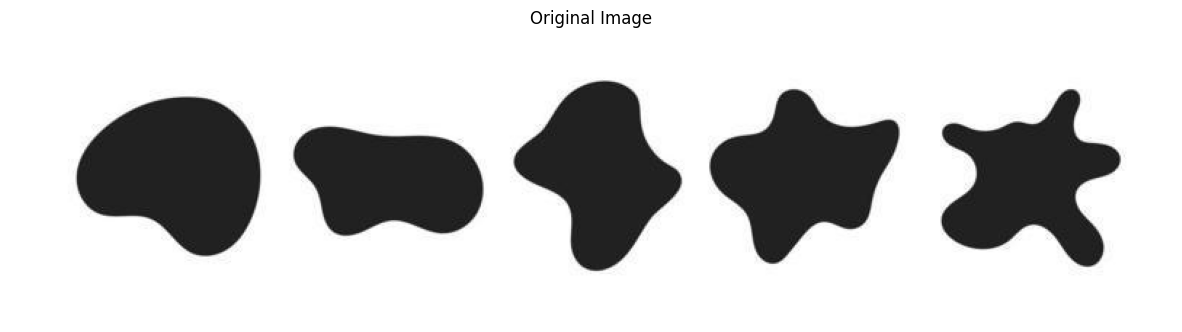

In [3]:
image = cv2.imread(shapes_path)

#Display the image
plt.figure(figsize=[15,10])
plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis("off")

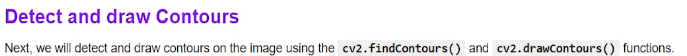

(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

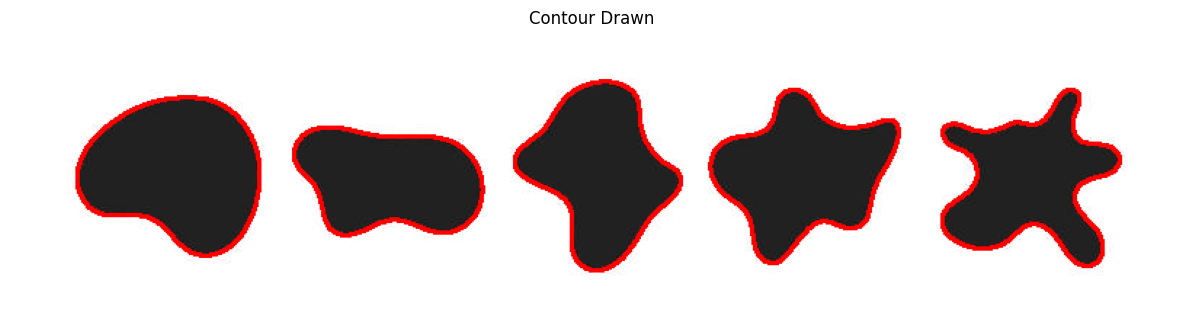

In [4]:
image1_copy = image.copy()

#Convert to grayscle
image_gray = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)

# Invert the colours
gray_inverted = cv2.bitwise_not(image_gray)

#create a binary threshold image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

#find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#draw all the contour found
cv2.drawContours(image1_copy, contours, -1, (0,0,255), 2)


plt.figure(figsize=[15,15])
plt.imshow(image1_copy[:,:,::-1]);plt.title("Contour Drawn");plt.axis('off')


 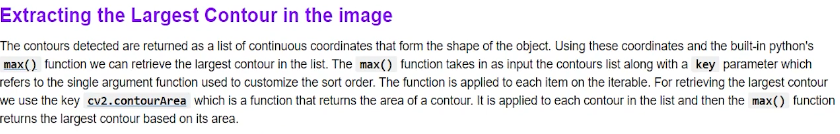

(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

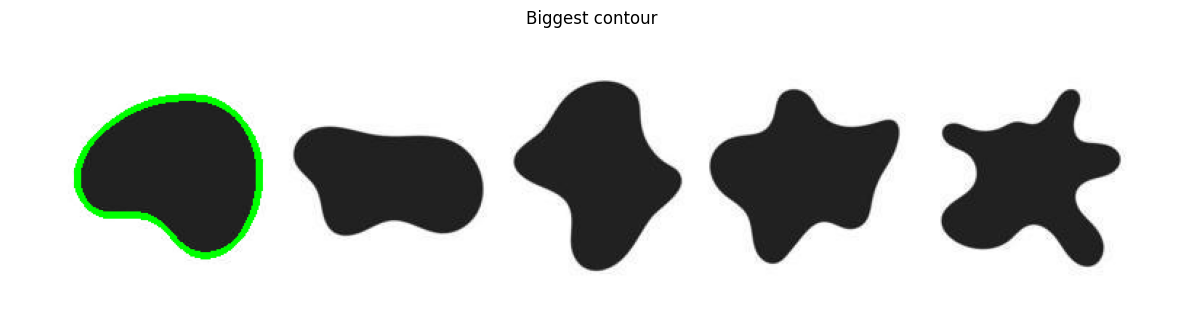

In [5]:
image2_copy = cv2.imread(shapes_path)

#Convert to grayscle
image_gray = cv2.cvtColor(image2_copy, cv2.COLOR_BGR2GRAY)

# Invert the colours
gray_inverted = cv2.bitwise_not(image_gray)

#create a binary threshold image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)


#find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

#retreive the biggest contour
biggest_contour = max(contours, key = cv2.contourArea)

#draw the biggest contour
cv2.drawContours(image2_copy, biggest_contour, -1, (0,255,0), 4)

plt.figure(figsize=[15,15])
plt.imshow(image2_copy[:,:,::-1]);plt.title("Biggest contour");plt.axis('off')

In [6]:
cv2.contourArea(biggest_contour)

9754.0

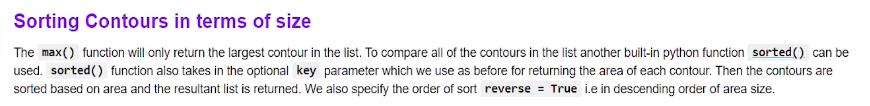

(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

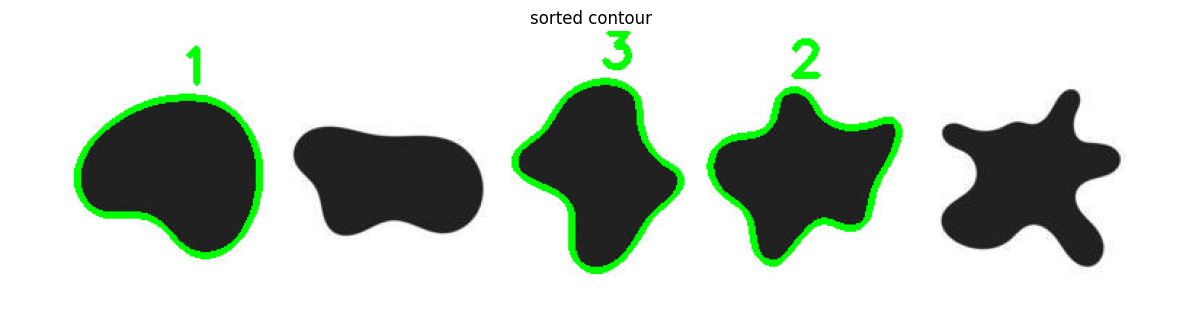

In [7]:
image3_copy = image.copy()

#sort the contours in decreasing order
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for i, cont in enumerate(sorted_contours[:3],1):  # t[:3] top 3

    #draw the contours
    cv2.drawContours(image3_copy, cont, -1, (0,255,0), 3)

    #Display the position of contour in sorted list
    cv2.putText(image3_copy, str(i), (cont[0,0,0], cont[0,0,1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,255,0),4)

#Display the result
plt.figure(figsize=[15,15])
plt.imshow(image3_copy[:,:,::-1]);plt.title("sorted contour");plt.axis('off')


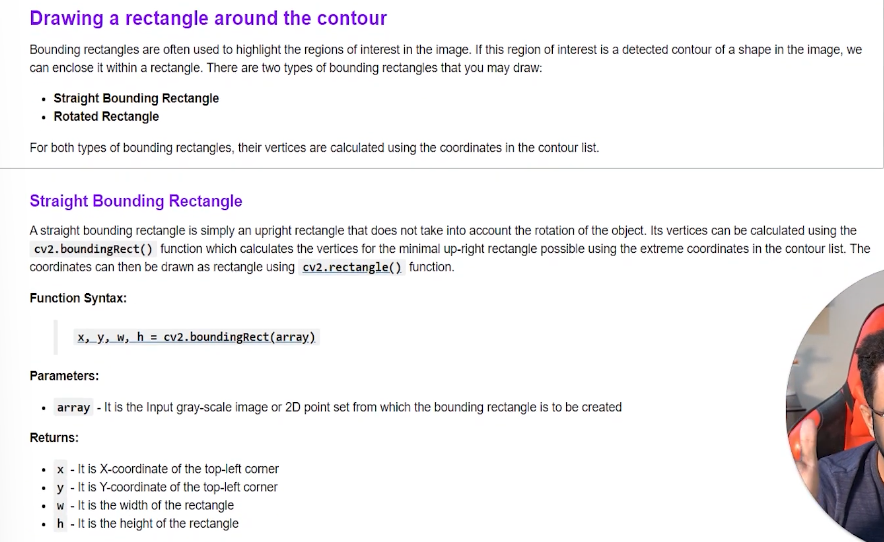

(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

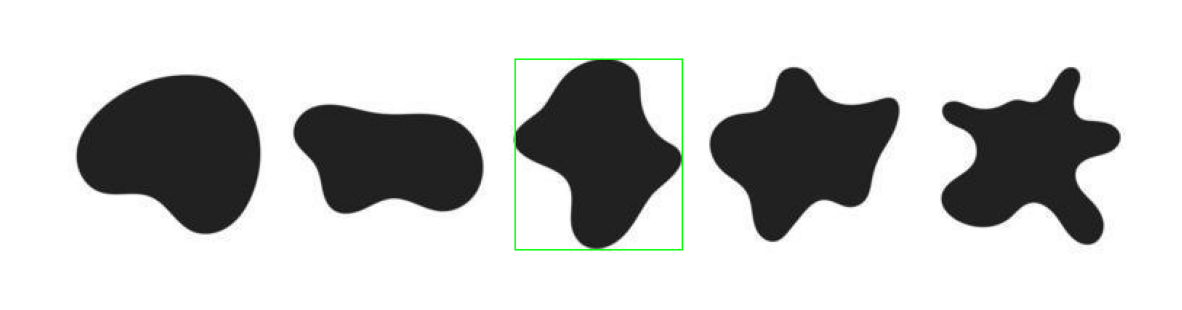

In [8]:
image4_copy = image.copy()
#Get the bounding rectangle
x, y, w, h = cv2.boundingRect(contours[4])

#Draw the rectangle around the object
cv2.rectangle(image4_copy, (x, y),(x+w, y+h), (0, 255, 0), 1)

#Display the result
plt.figure(figsize=[15,15])
plt.imshow(image4_copy[:,:,::-1]);plt.axis('off')

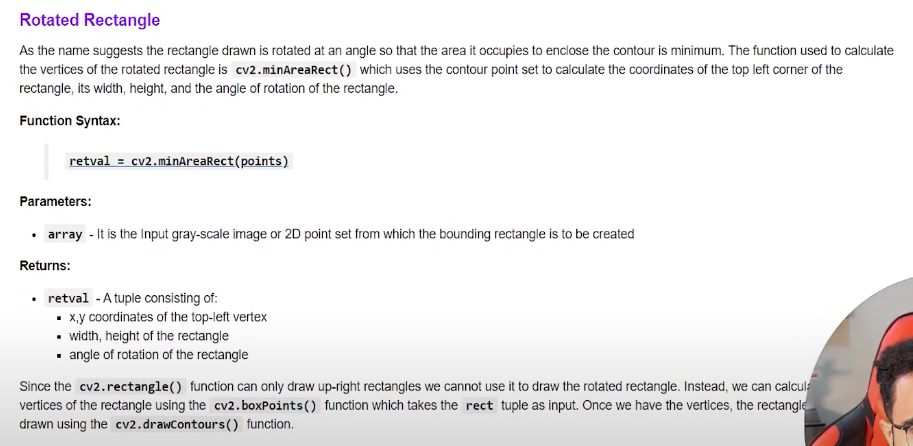

((407.03167724609375, 96.51131439208984), (115.26921081542969, 96.81106567382812), 56.523719787597656)


(np.float64(-0.5), np.float64(799.5), np.float64(199.5), np.float64(-0.5))

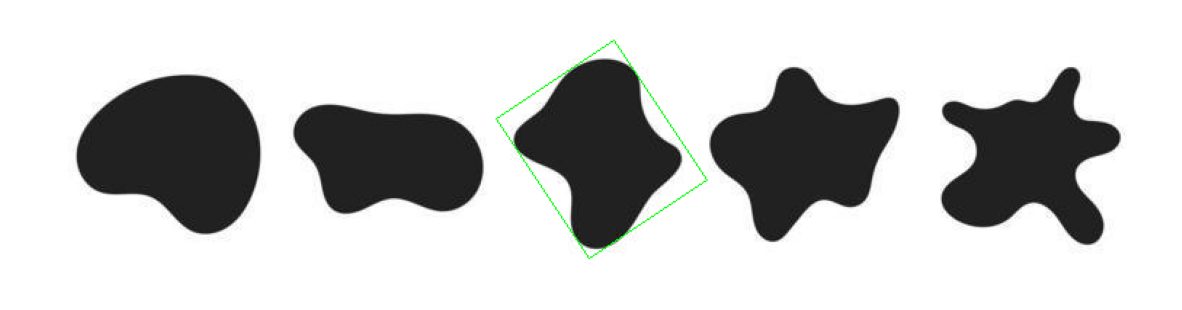

In [9]:
image5_copy = image.copy()

#calculate the minimum area bounding rect
rect  = cv2. minAreaRect(contours[4])
print(rect)

#convert the rect object to box points  
box = cv2.boxPoints(rect).astype('int')    # min area rect will have angle , this line of code rotate at that angle and find new cordinates [int is used to draw rectangle ]
box1 = cv2.boxPoints(rect).astype('float')
#draw a rectangle around the object
cv2.drawContours(image5_copy,[box], 0, (0,255,0),1)

#Display the result
plt.figure(figsize=[15,15])
plt.imshow(image5_copy[:,:,::-1]);plt.axis('off')

In [10]:
box1 

array([[334.86517334,  75.13755798],
       [415.61663818,  21.73738098],
       [479.19818115, 117.8850708 ],
       [398.44671631, 171.2852478 ]])

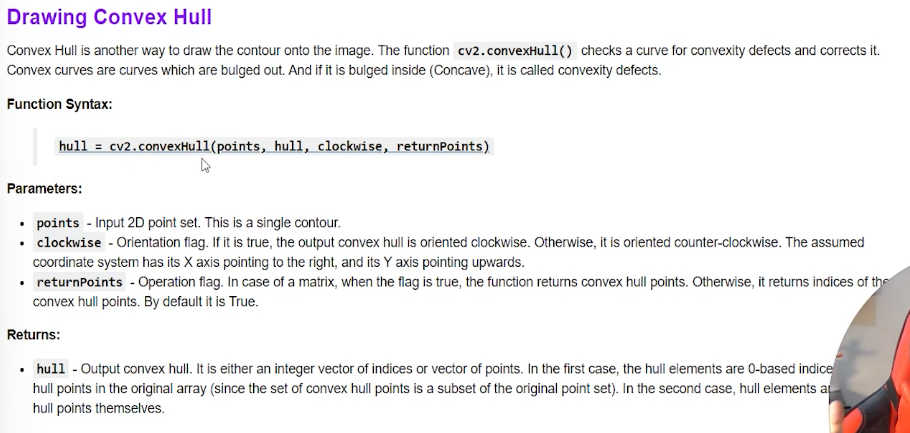

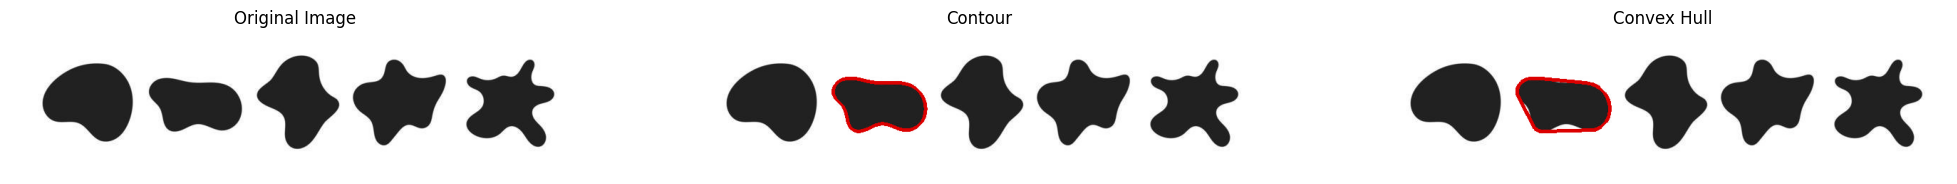

In [11]:
image6_copy = image.copy()
hull_img = image.copy()
contour_img = image.copy()

# Since the image only has one contour, grab the first contour
cnt = contours[0]

# Get the required hull
hull = cv2.convexHull(cnt)

# draw the hull
cv2.drawContours(hull_img, [hull], 0, (0, 0, 220), 3)

# draw the contour
cv2.drawContours(contour_img, [cnt], 0, (0, 0, 220), 3)

plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(image6_copy[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(132);plt.imshow(contour_img[:,:,::-1]);plt.title("Contour");plt.axis('off');
plt.subplot(133);plt.imshow(hull_img[:,:,::-1]);plt.title("Convex Hull");plt.axis('off');
